In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [2]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Tue Jan 28 15:35:25 2020


In [3]:
import numpy as np
import pandas as pd
import matplotlib

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from enum import Enum
from scipy.linalg import norm


In [5]:
from dataclasses import dataclass
import abc
from typing import Sequence

from pynext.system_of_units import *
from pynext.graphics import draw_cylinder
from pynext.graphics import draw_sphere
from pynext.graphics import draw_cylynder_surface
from pynext.graphics import draw_vuv
from pynext.graphics import draw_spherical_sample
from pynext.graphics import draw_points_sphere
from pynext.graphics import draw_random_point_around_point
from pynext.graphics import draw_vuv_to_blue
from pynext.graphics import vuv_to_blue_transport_from_point_with_graphics

In [29]:
from pynext.pynext_types import Cylinder, Sphere, Ray
from pynext.pynext_types import FiberWLS 
from pynext.pynext_types import WLS

In [7]:
from pynext.pynext_base import sample_spherical
from pynext.pynext_base import vectors_spherical
from pynext.pynext_base import xyz_from_points
from pynext.pynext_base import vuv_transport
from pynext.pynext_base import  xyz_from_vuv
from pynext.pynext_base import  vuv_fractions
from pynext.pynext_base import  ray_intersection_with_cylinder
from pynext.pynext_base import  cylinder_intersection_roots
from pynext.pynext_base import  ray_intersection_with_cylinder_end_caps
from pynext.pynext_base import  xyz_from_points
from pynext.pynext_base import  point_inside_cylinder
from pynext.pynext_base import  point_in_cylinder
from pynext.pynext_base import  unit_vectors_from_two_points
from pynext.pynext_base import  vuv_to_blue_transport_from_point
from pynext.pynext_base import  blue_to_blue_transport_from_point
from pynext.pynext_base import  vuv_to_blue_transport
from pynext.pynext_base import  blue_to_green_transport
from pynext.pynext_base import  random_point_around_p_inside_cylinder
from pynext.pynext_base import  in_endcaps
from pynext.pynext_base import  throw_dice

In [8]:
from typing import Tuple, List

## Defines and draws a cylinder

In [16]:
r    = 50 * cm
zmin = -50 * cm
zmax = 50 * cm
chd =Cylinder(r, zmin, zmax)
chd

Cylinder(r=500.0, zmin=-500.0, zmax=500.0)

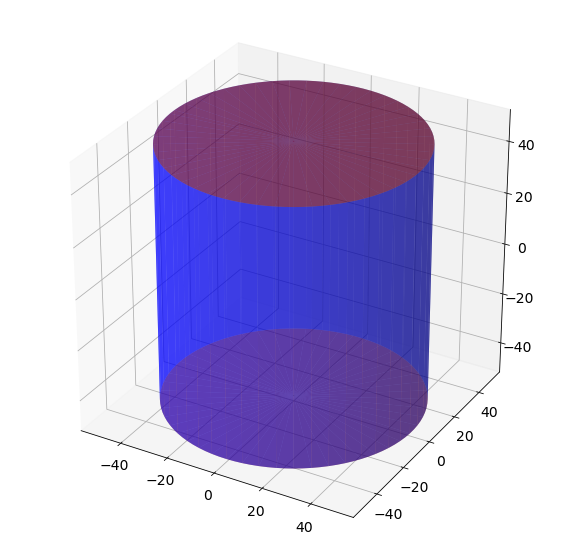

In [17]:
draw_cylinder(chd, units=cm, alpha=0.5, figsize=(10,10))

## VUV and blue
- vuv_transport() generates VUV photons in point "p", and then transports them to cylynder. 
- vuv_to_blue_transport(), takes every vuv photon, re-emits it 4pi and transports to cylinder

In [18]:
vuv = vuv_transport(chd, p=np.array([0,0,0]), nphotons=10000)

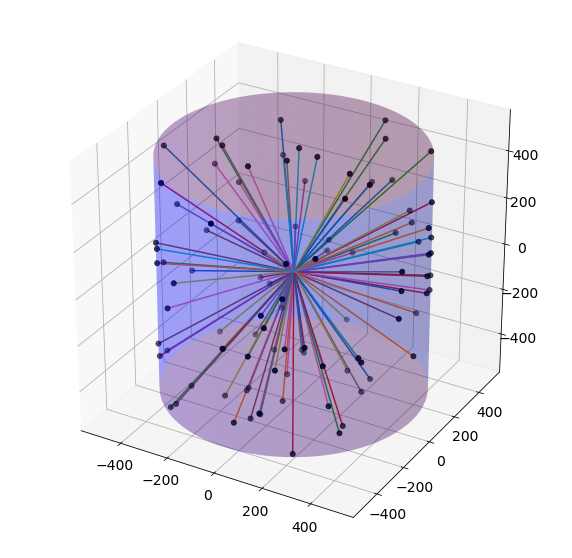

In [19]:
draw_vuv(vuv[0:100], chd, drawRays=True, figsize=(10,10))

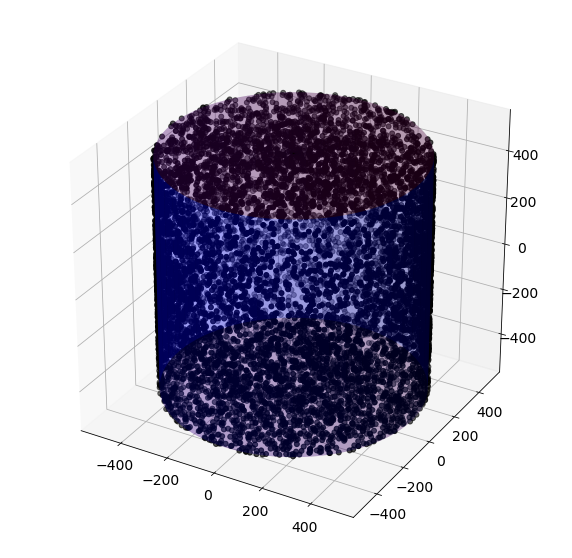

In [20]:
draw_vuv(vuv, chd, drawRays=False, figsize=(10,10))

In [21]:
blue = vuv_to_blue_transport(chd, vuv)

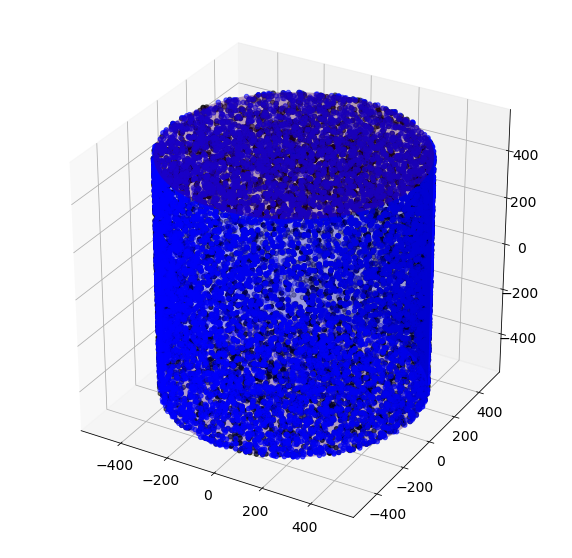

In [23]:
draw_vuv_to_blue(vuv, blue, chd, drawBlue=True, figsize=(10,10))

## Blue to green photons transport
- if blue photon in end-cap: reflect, and multiply its weight by effTeflon. 
- if blue photon in barrel. Throw a random number: if smaller than TrappingEfficiency, then photon is trapped in fiber. Otherwise reflect it. 

In [30]:
tpb = WLS(name='TPB', qeff=0.65)
tpb

WLS(name='TPB', qeff=0.65)

In [31]:
fwls = FiberWLS(d = 2*mm, wls = tpb, qfib = 0.85, qptfe=0.98, ncore = 1.6, nclad1 = 1.49, nclad2 = 1.42, latt = 3.5*m)
fwls


        diameter =2.0 mm, Q = 0.85, PTFE refl = 0.98
        ncore = 1.6, nclad1 =1.49, nclad2 =1.42
        Absoprtion prob at 450 nm     = 0.8906170225195483
        Trapping efficieny            = 0.09837038590604039
        Fiber coated with WLS         = TPB
        WLS QE                        = 0.65

    

In [35]:
ng, nabsPTFE, nabsFiber, nendFiber, nr = blue_to_green_transport(chd, blue, fwls, nphotons=1e+9, verbose=False)

In [37]:
print(f' green photons ={ng}, absorbed by PTFE ={nabsPTFE}, absorbed by fiber ={nabsFiber}, not-reemited by fiber ={nendFiber}')

 green photons =8319, absorbed by PTFE =183, absorbed by fiber =9817, not-reemited by fiber =1498


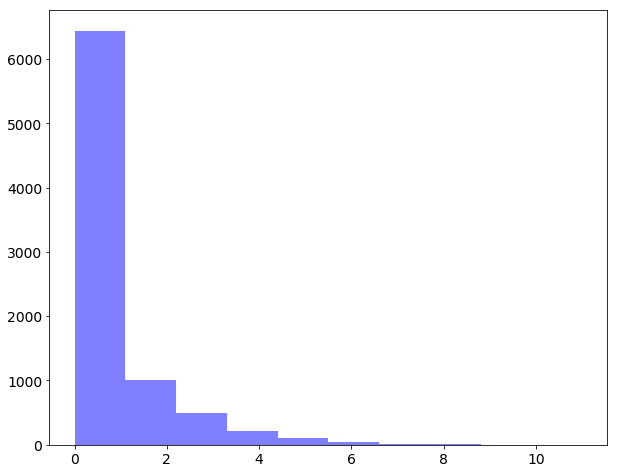

In [38]:
n, bins, patches = plt.hist(nr, facecolor='blue', alpha=0.5)
